In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def mesh(L,N):
    x = np.linspace(0,L,N+2)
    return (L / (N+1), x)

In [2]:
def Laplaciano1D(N, h, Gamma, rho, v):
    a =  Gamma / h**2
    b =  rho * v / (2*h)
    A = np.zeros((N,N))
    A[0,0] = 2 * a 
    A[0,1] = b - a
    for i in range(1,N-1):
        A[i,i] = 2 * a 
        A[i,i+1] = b - a
        A[i,i-1] = -b - a
    A[N-1,N-2] = -b - a
    A[N-1,N-1] = 2 * a
    return A

In [3]:
def plotSol(x, u, xa, ua, style='classic'):
    with plt.style.context(style):
        plt.figure(figsize=(10,5))
        plt.scatter(x,u, zorder=5, s=100, fc='C1', ec='k', alpha=0.75, label='Numérica')
        plt.plot(x,u, 'C1--', lw=1.0)
        plt.plot(xa,ua,'k-', label='Analítica')
        plt.xlabel('x [m]')
        plt.ylabel('u')
        plt.grid()
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [4]:
def analyticSol(par, NP = 100):
    L     = par['L']
    rho   = par['rho']
    v     = par['v']
    Gamma = par['Gamma']
    phi0  = par['BC'][0]
    phiL  = par['BC'][1]
    
    xa = np.linspace(0, L, NP)
    ua = (np.exp(rho * v * xa / Gamma) - 1) / (np.exp(rho * v * L / Gamma) - 1) * (phiL - phi0) + phi0
    return (xa, ua) 

In [5]:
def fdmSol(par):
    L     = par['L']
    Gamma = par['Gamma']
    rho   = par['rho']
    v     = par['v']
    N     = par['N']
    phi0  = par['BC'][0]
    phiL  = par['BC'][1]
    h     = par['h']
    
    f = np.zeros(N)         
    A = Laplaciano1D(N, h, Gamma, rho, v) 

    f[0]   =  phi0 * (rho * v / (2*h) + Gamma / h**2) 
    f[N-1] = -phiL * (rho * v / (2*h) - Gamma / h**2)

    u = np.zeros(N+2)

    u[1:N+1] = np.linalg.solve(A,f)

    u[0] = phi0
    u[N+1] = phiL

    return u

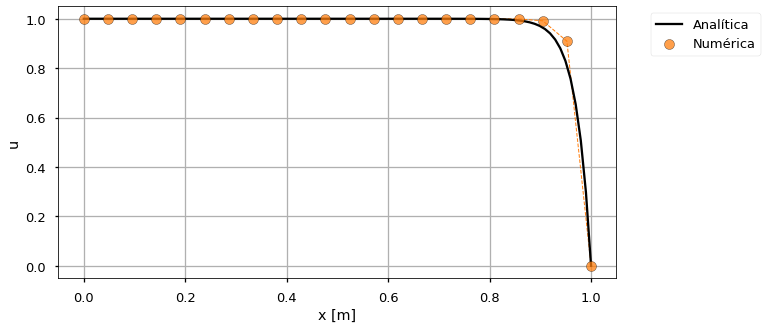

In [18]:
par = {}
par['L']     = 1.0 # m
par['rho']   = 1.0 # kg/m^3
par['v']     = 3.5 # m/s
par['Gamma'] = 0.1 # kg / m.s
par['BC']    = (1.0, 0.0)
par['N']     = 20 # Número de incógnitas

h, x = mesh(par['L'], par['N'])

par['h'] = h

par
xa, ua = analyticSol(par)

plotSol(x, fdmSol(par), xa, ua, 'seaborn-talk')